# Technical indicators

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ta import momentum, trend
from alpha_vantage.techindicators import TechIndicators
import os
from dotenv import load_dotenv
load_dotenv()

key = os.environ["ALPHA_VANTAGE_KEY"]
df = pd.read_csv("tsla.csv", index_col=0,parse_dates=[0])

## SMA - Simple Moving Average

In [2]:
def get_sma(close,window=12, fillna=False):
    return trend.sma_indicator(close=close, window=window,fillna=fillna)

# Reverse the dataset to put in the oldest values first
sma = get_sma(df['5. adjusted close'][::-1])
sma = sma.dropna()

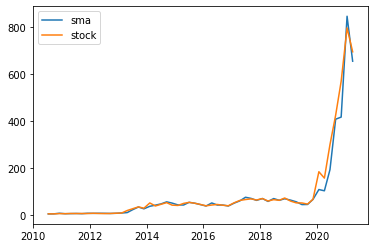

In [3]:
# Plot every 50th item
plt.plot(sma.keys()[::50], sma[::50], label="sma")
plt.plot(sma.keys()[::50], df['5. adjusted close'][::50][::-1], label="stock")
plt.legend()
plt.show()

## EMA - Exponential Moving Average

In [4]:
def get_ema(close,window=12, fillna=True):
    return trend.ema_indicator(close=close, window=window,fillna=fillna)

# Reverse the dataset to put in the oldest values first
ema = get_ema(df['5. adjusted close'][::-1])

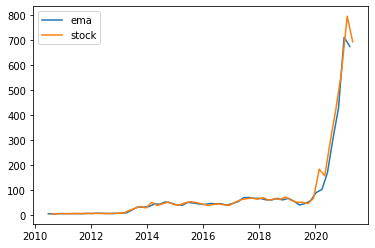

In [5]:
# Plot every 50th item
plt.plot(ema.keys()[::50], ema[::50], label='ema')
plt.plot(df.index[::50][::-1], df['5. adjusted close'][::50][::-1], label="stock")
plt.legend()
plt.show()

## ROC - Rate of Change

In [6]:
def get_roc(close, window=50, fillna=True):
    return momentum.roc(close, window=window, fillna=True)
roc = get_roc(df['5. adjusted close'][::-1])
df.index[::50][::-1]

DatetimeIndex(['2010-08-05', '2010-10-15', '2010-12-28', '2011-03-10',
               '2011-05-20', '2011-08-02', '2011-10-12', '2011-12-22',
               '2012-03-07', '2012-05-17', '2012-07-30', '2012-10-09',
               '2012-12-21', '2013-03-07', '2013-05-17', '2013-07-30',
               '2013-10-09', '2013-12-19', '2014-03-05', '2014-05-15',
               '2014-07-28', '2014-10-07', '2014-12-17', '2015-03-03',
               '2015-05-13', '2015-07-24', '2015-10-05', '2015-12-15',
               '2016-02-29', '2016-05-10', '2016-07-21', '2016-09-30',
               '2016-12-12', '2017-02-24', '2017-05-08', '2017-07-19',
               '2017-09-28', '2017-12-08', '2018-02-22', '2018-05-04',
               '2018-07-17', '2018-09-26', '2018-12-07', '2019-02-21',
               '2019-05-03', '2019-07-16', '2019-09-25', '2019-12-05',
               '2020-02-19', '2020-04-30', '2020-07-13', '2020-09-22',
               '2020-12-02', '2021-02-16', '2021-04-28'],
              dtype

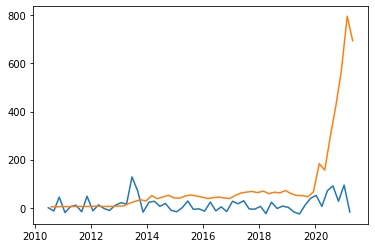

In [7]:
# Plot every 50th item
plt.plot(roc.keys()[::50], roc[::50], label='roc')
plt.plot(df.index[::50][::-1], df['5. adjusted close'][::50][::-1], label="stock")
plt.show()

## Compare calculated SMA to Alphavantage SMA

In [33]:
ti = TechIndicators(key=key, output_format="pandas")
sma_av = ti.get_sma(symbol="TSLA", interval="daily", time_period=12, series_type="close")

if not isinstance(sma, pd.DataFrame):
    sma = sma.to_frame()
    
sma.rename(columns={"sma_12": "SMA"}, inplace=True)
sma = sma.round(decimals=4)

difference = sma_av[0].compare(sma)
columns = difference.columns
overall_difference = sum(abs(difference[columns[0]] - difference[columns[1]]))
overall_difference


0.004299999999993531